In [17]:
:opt no-lint
import Diagrams.Backend.Cairo.CmdLine

In [18]:
{-# LANGUAGE NoMonomorphismRestriction TupleSections FlexibleContexts #-}
import Diagrams.Prelude hiding (connect)
import Data.Colour.SRGB (sRGB24read)

In [19]:
colors = map sRGB24read ["#5E0042", "#00856A"]

To create one quarter of the diagram, we connect the corresponding
points with headless arrows and alternate the line colors.



In [20]:
quarter n = mconcat [arrowBetween' 
  (with & arrowHead .~ noHead
        & shaftStyle %~ lw thin . lc (colors !! ((xCoord1 p) `mod` 2)))
  (fst p) (snd p) | p <- ps]
  where
    xCoord1 = round . fst . unp2 . fst
    ps = zip xs (reverse ys)
    (xs, ys) = pts n

The final diagram is created by assembling four copies of the above.



In [21]:
d n = half === rotateBy (1/2) half
  where
    half = (rotateBy (1/4) q ||| q) # centerX
    q = quarter n

In [22]:
pts n = (map (p2 . (,0)) [0..n], map (p2 . (0,)) [0..n])

In [23]:
example = pad 1.1 $ d 20 # centerXY `atop` square 50 # fc whitesmoke

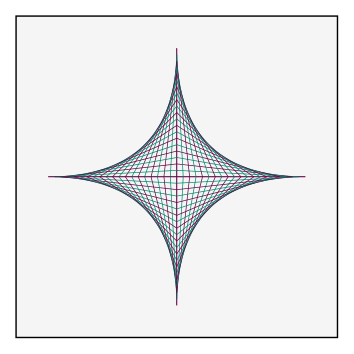

In [24]:
diagram example